<a href="https://colab.research.google.com/github/JamisonHunter/Product-Sales-Prediction/blob/main/prediction_of_product_sales_j_hunter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

Jamison Hunter

# Project Overview

# Load and Inspect Data

# Loading Libraries and Data

In [1]:
# loading in the necessary imports for data analysis and cleaning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# giving the notebook permission to access my Google drive in order to access sales_predictions.csv
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Inspecting Data

In [3]:
# saving the Google drive path for sales_predictions.csv as a variable
sales_file = "/content/drive/MyDrive/sales_predictions.csv"

In [4]:
# turning the sales_file variable into a data frame 
df = pd.read_csv(sales_file)
# printing data frame information along with the first 5 rows of the data frame
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Cleaning

In order to present consistent charts thropughout, I will begin by setting up the default graph style for this data analysis. 

In [5]:
# setting the style for seaborn graphs
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

<ipython-input-5-8f49f4079863>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-5-8f49f4079863>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


In [6]:
# stating the number of rows and columns in the data set
print(f"This data set has {df.shape[0]} rows and {df.shape[1]} columns.")

This data set has 8523 rows and 12 columns.


In [7]:
# checking data types in the data set
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
# checking for duplicate rows
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


# Addressing Missing Values



In [9]:
# stating the total number of missing values in the data set
print(f"There are {df.isna().sum().sum()} missing values.")

There are 3873 missing values.


In [10]:
# checking for missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# displaying the percentage of missing data by column
print(df.isna().sum()/len(df)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


Numerous values seem to be missing from both Item_Weight and Outlet_Size. 



*   Item_Weight is missing 17.165%.
*   Outlet_Size is missing 28.276%.

These missing values should show up as "NaN" values, which will need to be replaced.



In [12]:
# inspecting the first 5 rows of missing data in Item_Weight
df[df["Item_Weight"].isna()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [13]:
# inspecting the first 5 rows of missing data in Outlet_Size
df[df["Outlet_Size"].isna()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


Since the amount of values missing from both Item_Weight and Outlet_Size is less than 50% and greater than 5%, I will choose to replace any "NaN" values with "Unknown." I believe this will result in the least amount of data skew or data loss. 

In [14]:
# filling in missing data in the Item_Weight column and the Outlet_Size solumn
df['Item_Weight'].fillna(value = "Unknown", inplace = True)
df['Outlet_Size'].fillna(value = "Unknown", inplace = True)
# double checking to see if the missing data has been filled in
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

The data set no longer has any missing values. 


# Addressing Inconsistent Values

I am going to check every column taking object class data in order to make sure the values are consistent. 

In [15]:
# checking each object column's unique entries
# adding spacing for ease of reading
print(df["Item_Fat_Content"].unique())
print()
print(df["Item_Type"].unique())
print()
print(df["Outlet_Location_Type"].unique())
print()
print(df["Outlet_Type"].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

['Tier 1' 'Tier 3' 'Tier 2']

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


There appears to be several inconsistencies in the Item_Fat_Content column. I will address this by changing "LF" and "low fat" into "Low Fat." I will also change any "reg" values into "Regular."

In [16]:
# replacing LF with Low Fat
df = df.replace(to_replace="LF",
           value="Low Fat")
# replacing low fat with Low Fat
df = df.replace(to_replace="low fat",
           value="Low Fat")
# replacing reg with Regular
df = df.replace(to_replace="reg",
           value="Regular")
# checking to make sure the values of Item_Fat_Content are correct
print(df["Item_Fat_Content"].unique())

['Low Fat' 'Regular']


# Numerical Column Statistics

In this section, there will be listed the necessary statistics for numerical columns in order to find the mean, median, and mode, of each column. 

In [17]:
# stating the statistics for each numerical column
df.describe(include = "number")

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


Text(0.5, 1.0, 'Numerical Column Deviation')

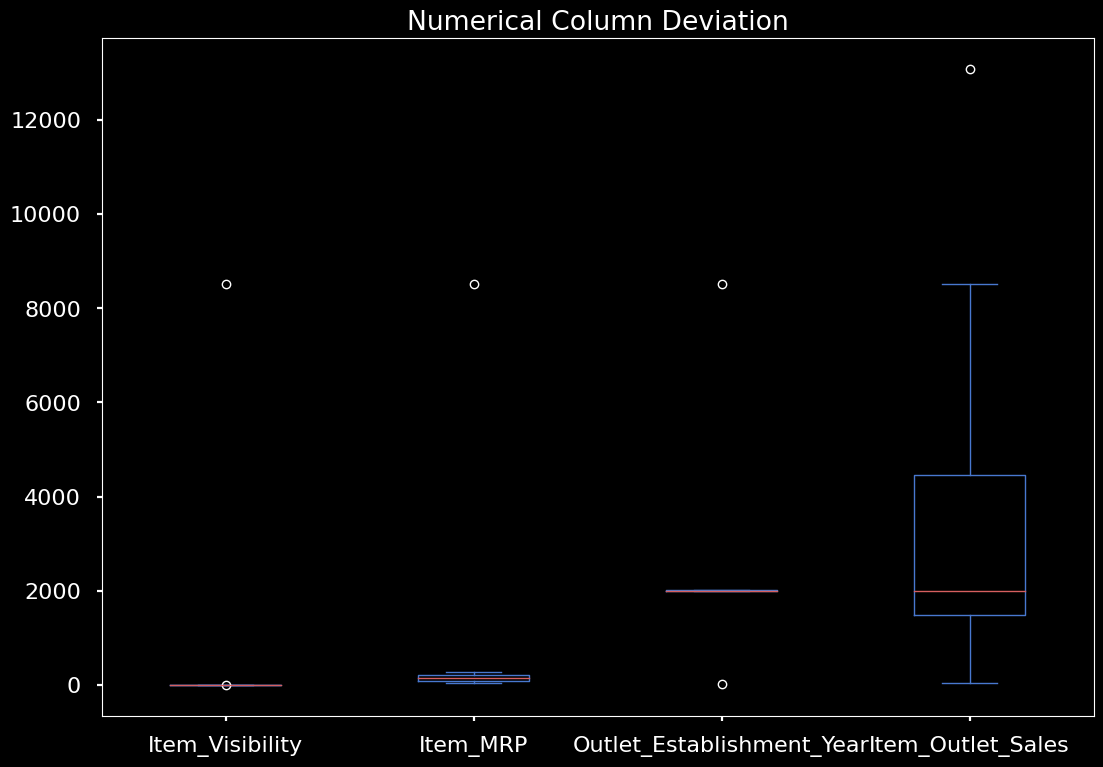

In [18]:
# setting the numerical column statistics equal to a variable
ndata = df.describe(include = "number")
# generating numerical column statistics as a bar graph
ax = ndata.plot(kind = "box")
# setting the graph title
ax.set_title("Numerical Column Deviation")

Based on the above graph, it can be seen that Item_Outlet_Sales can vary quite wildly at its minimum and maximum points. This will be useful information as analysis continues. 

# Exploratory Data Analysis

First, I will create a histogram in order to analyze numerical data columns. 

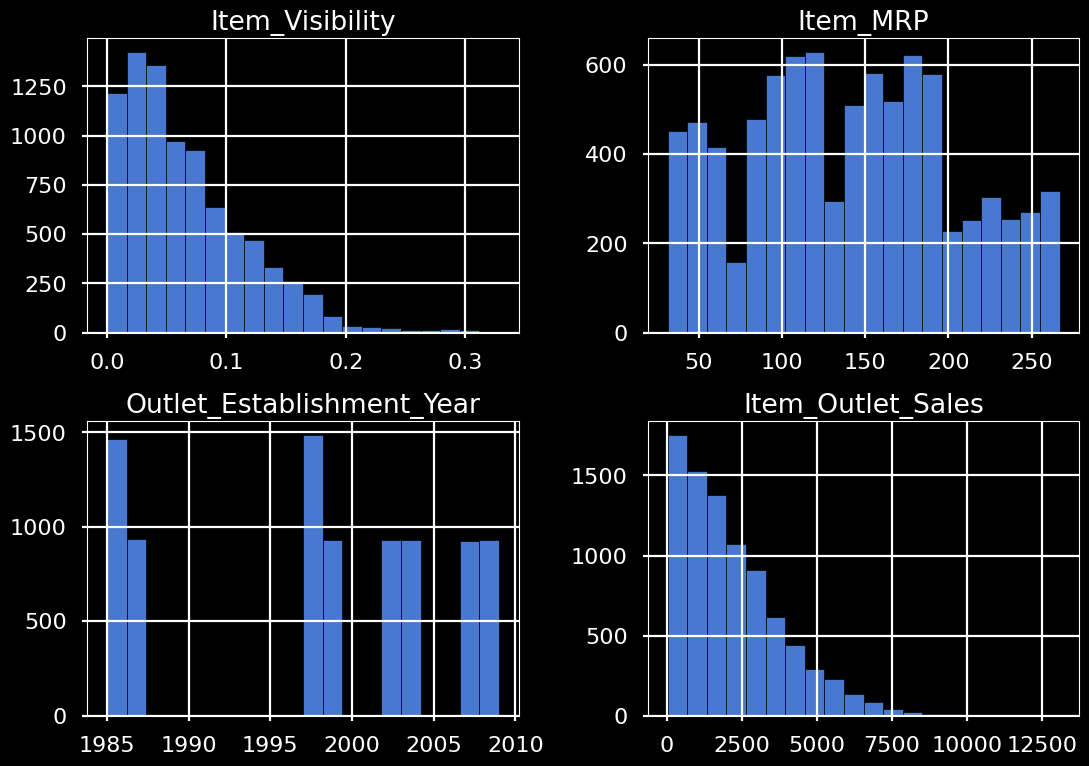

In [32]:
ax = df.hist(bins = 20, edgecolor = "black")

Both Item_Visibility and Item_Outlet_Sales skew strongly left while Item_MRP skews only very slightly left. Item_Establishment_Year skews slightly right but I doubt this to be very meaningful. 

In this next portion, the data set will be analyzed graphically in order to search for possible correlations.

In [24]:
# checking for correlations numerically
corr = df.corr()
df.corr()

<ipython-input-24-98540b2ed3cb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-24-98540b2ed3cb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

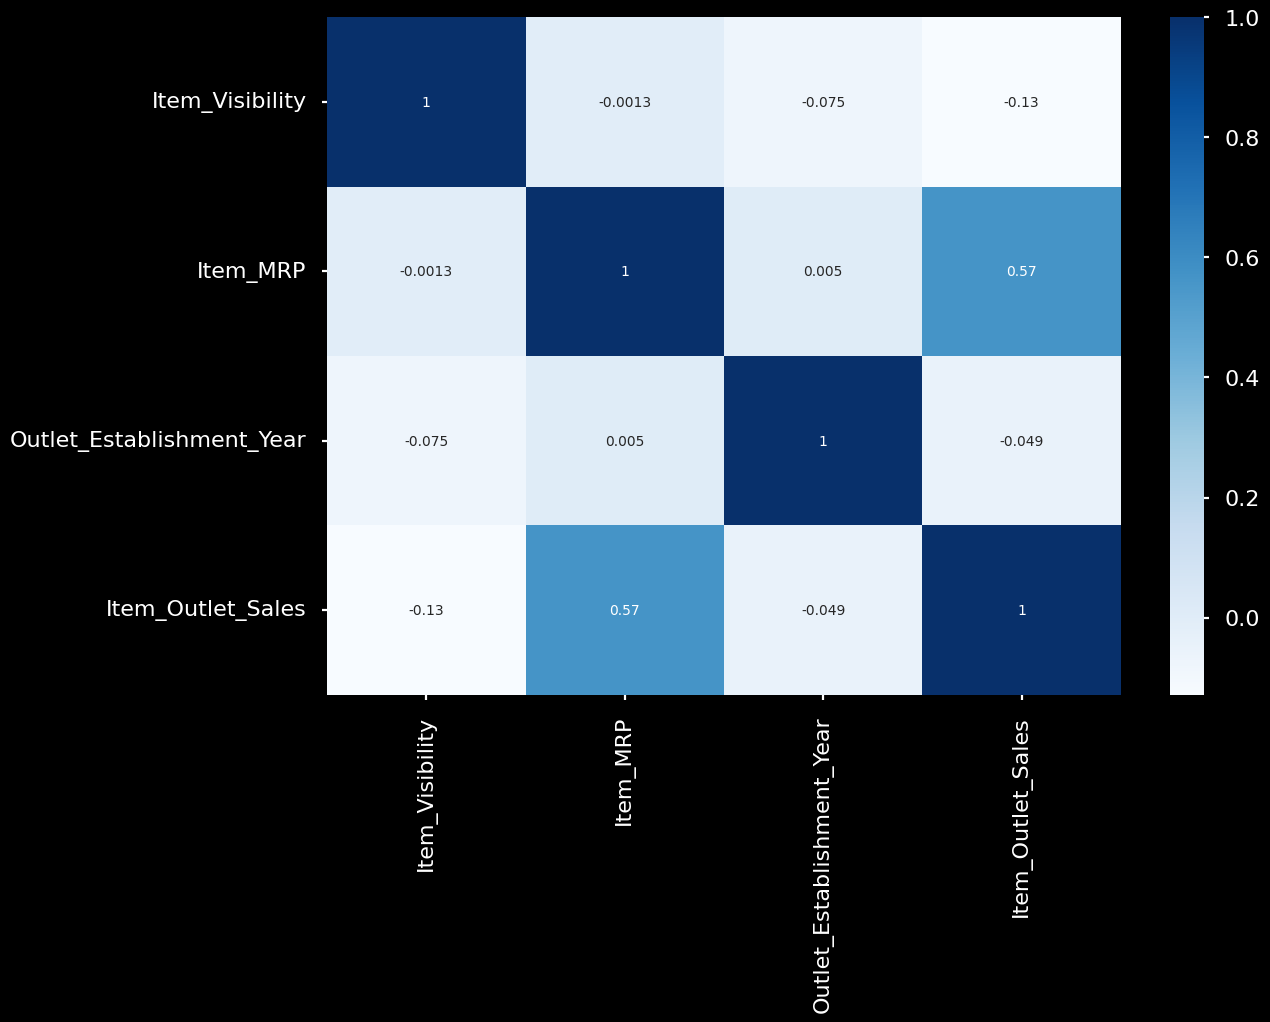

In [27]:
sns.heatmap(corr, cmap = "Blues", annot = True)

There seems to be a moderate correlation between Item_MRP and Outlet_Sales.

# Explanatory Data Analysis